In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_parquet(r"C:\Users\tejas\Downloads\0000 (1).parquet")
df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [6]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.shape


(114000, 21)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [9]:
df.isnull().sum()


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
df.dropna(inplace=True)

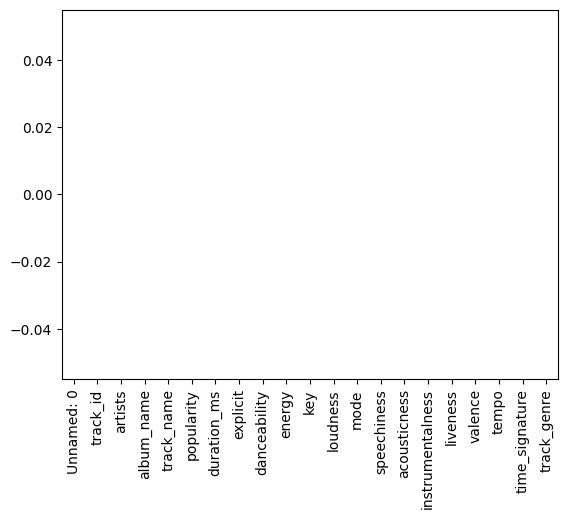

In [11]:
df.isnull().sum().plot.bar()
plt.show()

In [16]:
df['artists'].nunique(), df.shape


(31437, (113999, 21))

In [18]:
df = df.sort_values(by=['popularity'], ascending=False)
df.drop_duplicates(subset=['artists'], keep='first', inplace=True)


In [20]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.47200,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.2380,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.78200,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.5500,128.033,4,hip-hop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.67900,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.8500,124.980,4,reggaeton
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.96500,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,4,pop
88405,88405,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.71200,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.4250,92.005,4,reggae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,4192,0tVfMLnBs02zD6RhUmXnVs,Roger Eno;Brian Eno,Klassische Weihnachtsmusik,Snow,0,280093,False,0.407,0.00256,...,-31.357,0,0.0449,0.98900,0.940000,0.1190,0.1340,73.214,4,ambient
4247,4247,2GEqnEG1oGDEvf6nZGHjIx,Max Richter;Khatia Buniatishvili,"The Departure (Main title theme from ""The Left...","The Departure (Main title theme from ""The Left...",0,82509,False,0.180,0.00656,...,-35.400,0,0.0369,0.99500,0.956000,0.1070,0.0399,58.008,4,ambient
64674,64674,6BkEJgMiwbaOueELZXo27f,Groove Da Praia,"Vintage Café: Lounge and Jazz Blends, Vol. 22",Anybody Seen My Baby - Acoustic Version,0,139625,False,0.757,0.40800,...,-10.889,1,0.0373,0.32500,0.539000,0.1040,0.3090,115.960,4,jazz
107427,107427,4TGtgBOjT7ca4FtSyJZuay,Anoraak;LUXXURY;Lauren Turk,"House Invaders: Pure House Music, Vol. 5.5",Fire Inside - Original Mix,0,301092,False,0.748,0.67300,...,-7.386,1,0.0538,0.01610,0.041900,0.1230,0.8190,108.984,4,synth-pop


In [22]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df['track_genre'])


In [23]:
df= df.sort_values(by=['popularity'], ascending=False).head(10000)


In [29]:
def get_similarities(song_name, data):

  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['track_genre']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()

  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
	  name = row['track_name']
	
	  # Getting vector for current song.
	  text_array2 = song_vectorizer.transform(data[data['track_name']==name]['track_genre']).toarray()
	  num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()

	 # Calculating similarities for text as well as numeric features
	  text_sim = cosine_similarity(text_array1, text_array2)[0][0]
	  num_sim = cosine_similarity(num_array1, num_array2)[0][0]
	  sim.append(text_sim + num_sim)
	
  return sim


In [57]:
def recommend_songs(song_name, data=df):
  # Base case
  if df[df['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artists']][2:7])

In [58]:
recommend_songs('La Bachata')

,track_name,artists
89609,Sigue,J Balvin;Ed Sheeran
89965,Wherever I May Roam,J Balvin;Metallica
89824,Only The Team (with Lil Mosey & Lil Tjay),Rvssian;Lil Mosey;Lil Tjay
89964,Una Nota,J Balvin;Sech
89721,Feliz Cumpleaños Ferxxo,Feid


In [59]:
recommend_songs('Fire Inside - Original Mix')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Rotate
beamer boy
Light
Kyon
RAIN
